## BUSA8031 Business Analytics Project – Assignment 3

#### Approach: 
##### Data collection: 
- We use the most widely used sources is the "Our World in Data" (OWID) COVID-19 dataset, which provides global COVID-19 statistics as the dataset includes information on daily onew Covid-19 cases and hospitablised patients in these three countries.

##### 1. Analyze how the factors of number of people vaccinated, population density, age 65 older, hospital beds per thousand, and stringency index influence the spread of the virus for all countries in the world.

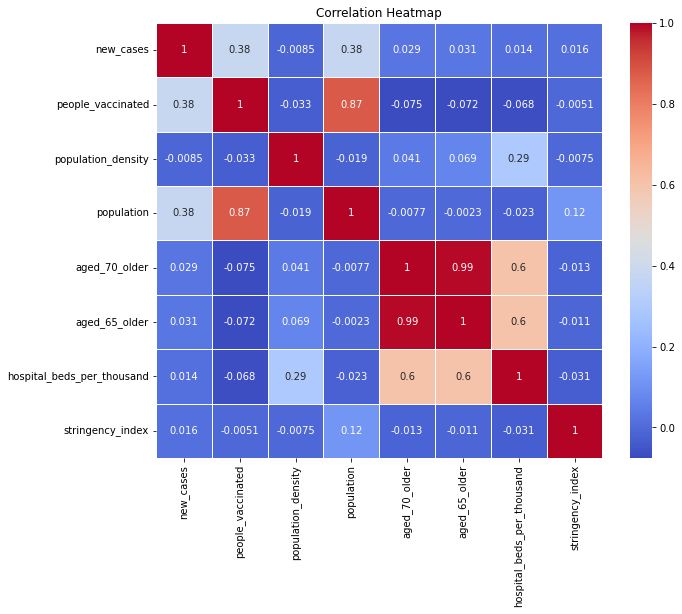

In [1]:
import pandas as pd

# Load the OWID COVID-19 dataset
data = pd.read_csv('owid-covid-data.csv')

# Convert date column to datetime
data['date'] = pd.to_datetime(data['date'], errors='coerce')

# Handle missing values if necessary
data.dropna(subset=['date'], inplace=True)

# Calculate correlations
correlation_matrix = data[['new_cases', 'people_vaccinated','population_density','population','aged_70_older','aged_65_older', 'hospital_beds_per_thousand', 'stringency_index']].corr()

import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap to visualize correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

The heatmap provides a clear visual representation of the correlations as below:
- Factors have strong correlations to covid-19 outcome: population of the country, number of people got vaccinated
- Factors also have medium correlations to covid-19 outcomes: aging of population, number of hospitals per thousand people and stringency index.
- Factors do not have a strong correlations to covid-19 outcomes: population indensity


##### 2. Comparative Analysis: analyze the trends in COVID-19 cases, deaths, and recoveries over time for Australia, New Zealand and Canada:
The reasons to choose these three countries: they have similar charateristic including geographical location, economy, and demographics as well as healthcare and education. 

| Syntax                    | New Zealand | Canada        |
| :---                      |    :----    |          :--- |
|                           |             |               |
| Geographical Location     | Geographically close to Australia, sharing a similar climate and culture      | Although not in the same region, Canada shares similarities in terms of vast landmass, multiculturalism, and strong natural resource sectors      |
| Economy                   |A developed economy with a strong agricultural sector and tourism industry, similar to Australia    |Rich in natural resources, Canada's economy has similarities to Australia's reliance on mining and commodities              |
| Demographics              |A culturally diverse society with a mix of indigenous and immigrant populations    |A multicultural and diverse population, like Australia   |
| Healthcare and Education  |Has a well-developed healthcare system and education sector |Offers a high standard of healthcare and education, similar to Australia  |

- We convert the date column into a time series format, making it easier to analyze trends over time.
- We would like to use time series analysis to identify patterns, seasonal variations, and long-term trends
- Finally, we create line plots or time series plots to visualize the daily or weekly trends in new Covid-19 cases and hospitalised patients over time.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import interactive

# Load the OWID COVID-19 dataset
data = pd.read_csv('owid-covid-data.csv')

# Filter data for Australia
countries = ['Australia', 'New Zealand', 'Canada']
filtered_data = data[data['location'].isin(countries)].copy()

# Convert the date column to datetime
filtered_data['date'] = pd.to_datetime(filtered_data['date'])

# Set the date column as the index
filtered_data.set_index('date', inplace=True)

# Create a dropdown widget for parameter selection
parameter_dropdown = widgets.Dropdown(
    options=['new_cases', 'hosp_patients', 'new_deaths'],
    description='Select Parameter:',
)

# Create a dictionary to map countries to colors
country_colors = {
    'Australia': 'green',
    'New Zealand': 'blue',
    'Canada': 'orange'
}

# Function to update and display the chart based on the selected parameter
def update_chart(selected_parameter):
    plt.figure(figsize=(12, 6))
    
    for country in countries:
        country_data = filtered_data[filtered_data['location'] == country]
        plt.plot(country_data.index, country_data[selected_parameter], label= f'{country} - {selected_parameter}', color=country_colors[country])
   
    plt.title('COVID-19 Time Series Analysis in Australia')
    plt.xlabel('Date')
    plt.ylabel('Count')
    plt.legend()
    plt.grid(True)
    plt.show()

# Create an interactive widget and pass selected_parameter explicitly
interactive_plot = interactive(update_chart, selected_parameter=parameter_dropdown)
display(interactive_plot)

interactive(children=(Dropdown(description='Select Parameter:', options=('new_cases', 'hosp_patients', 'new_de…

Data is not at vailable for 2020 and 2021 but available only for 2022 and year-to-date 2023.
Three countries show a declining trend of covid-19 cases in 2022 and YTD 2023.

##### 3. Time series analysis to identify patterns, seasonal variations, and long-term trends in COVID-19 outcomes in Australia:

3.1. Time series visualisation: we plot time series data for COVID-19 outcomes such as daily new cases, hospitalised patients and new deaths.

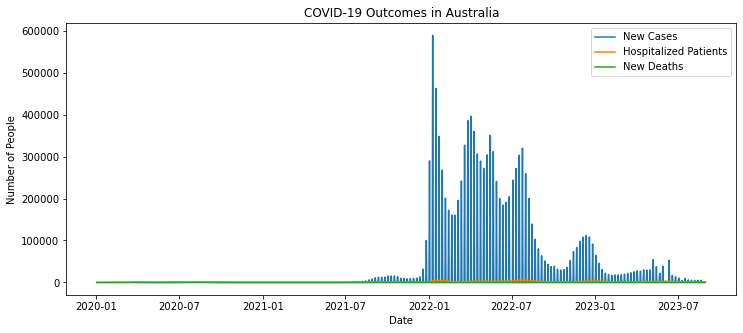

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Load the OWID COVID-19 dataset
owid_covid_data = pd.read_csv('owid-covid-data.csv')

# Filter the data to include only Australia
australia_data = owid_covid_data[owid_covid_data['location'] == 'Australia'].copy()

# Set the date column as a datetime object using .loc
australia_data.loc[:, 'date'] = pd.to_datetime(australia_data['date'])

# Set the date column as the index
australia_data.set_index('date', inplace=True)

# Create a new dataframe with only the columns we need
australia_cases = australia_data[['new_cases', 'hosp_patients', 'new_deaths']]

# Resample the data to monthly frequency and calculate the mean
monthly_averages = australia_cases.resample('M').mean()

# Set the figure size
fig, ax = plt.subplots(figsize=(12, 5))

# Plot the data
ax.plot(australia_cases)

# Add a legend
ax.legend(['New Cases', 'Hospitalized Patients', 'New Deaths'])

# Add axis labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Number of People')
ax.set_title('COVID-19 Outcomes in Australia')

plt.show()

3.2. Use seasonal decomposition to identify underlying patterns, seasonal variations, and trends of covid-19 hospitalised patients in Australia

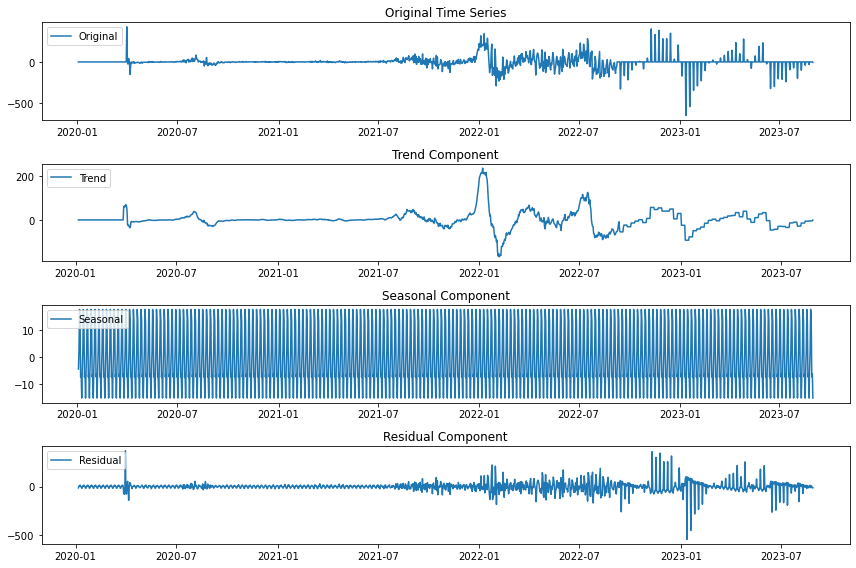

In [4]:
import statsmodels.api as sm

# Extract the 'new_cases' and 'hosp_patients' columns
hosp_patients = australia_data['hosp_patients'].fillna(0)

# Calculate the daily change in hospitalised patients
new_hosp_patients = hosp_patients.diff().fillna(0)

# Perform seasonal decomposition with a specific period
result = sm.tsa.seasonal_decompose(new_hosp_patients, model='additive', period=7)  # Assuming weekly seasonality

# Plot the decomposed components
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(new_hosp_patients, label='Original')
plt.legend(loc='upper left')
plt.title('Original Time Series')
plt.subplot(412)
plt.plot(result.trend, label='Trend')
plt.legend(loc='upper left')
plt.title('Trend Component')
plt.subplot(413)
plt.plot(result.seasonal, label='Seasonal')
plt.legend(loc='upper left')
plt.title('Seasonal Component')
plt.subplot(414)
plt.plot(result.resid, label='Residual')
plt.legend(loc='upper left')
plt.title('Residual Component')
plt.tight_layout()
plt.show()

##### Long-Term Trend Analysis in number of hospitalised patients due to Covid-19:  
- The key reason that we analyse the number of hospitalised patients relating to Covid-19 rather than new cases as currently only hospitalised patients relating to Covid-19 are detected and recorded as new Covid-19 case in Australia.
- We use linear regression to analyze the long-term trend in hospitalised patients
- We create a feature, 'days_since_first_hospitalised_patient' that represents the number of days since the first hospitalised patient in Australia.
- We perform linear regression to model the long-term trend, where 'X' is the 'days_since_first_hospitalised_patient,' and 'y' is the total hospitalised patients.
- We plot the total hospitalised patients and the linear regression line to visualize the long-term trend.
- The slope of the linear regression line indicates the rate of increase in total hospitalised patients per day, providing insights into the long-term trend.

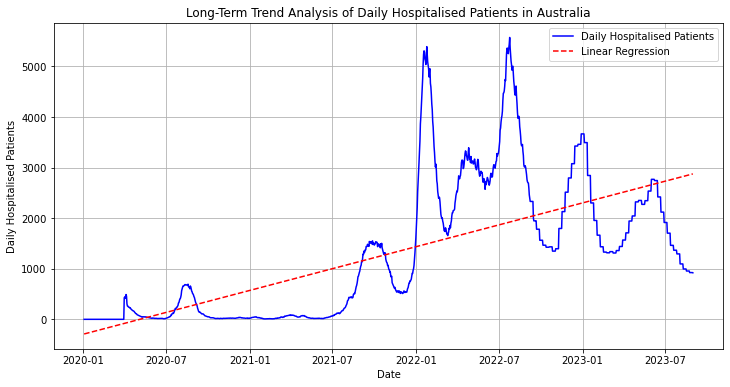

Slope of the linear regression line: 2.37 daily hospitalised patients per day


In [6]:
from sklearn.linear_model import LinearRegression

# Extract the 'hosp_patients' column
daily_hospitalised_patients = australia_data['hosp_patients'].fillna(0)  # Handle missing values by replacing with 0

# Create a feature for the number of days since the first case
australia_data['days_since_first_hospitalised_patient'] = (australia_data.index - australia_data.index[0]).days

# Perform linear regression
X = australia_data['days_since_first_hospitalised_patient'].values.reshape(-1, 1)
y = daily_hospitalised_patients.values.reshape(-1, 1)

reg = LinearRegression().fit(X, y)

# Predict daily hospitalised patients using linear regression
predictions = reg.predict(X)

# Plot the long-term trend
plt.figure(figsize=(12, 6))
plt.plot(australia_data.index, daily_hospitalised_patients, label='Daily Hospitalised Patients', color='blue')
plt.plot(australia_data.index, predictions, label='Linear Regression', linestyle='dashed', color='red')
plt.title('Long-Term Trend Analysis of Daily Hospitalised Patients in Australia')
plt.xlabel('Date')
plt.ylabel('Daily Hospitalised Patients')
plt.legend()
plt.grid(True)
plt.show()

# Print the slope (rate of increase) of the linear regression line
slope = reg.coef_[0][0]
print(f'Slope of the linear regression line: {slope:.2f} daily hospitalised patients per day')

- Because the linear regression results are not accurate for modeling the daily count of hospitalised patients, it's possible that the data exhibits non-linear trends or seasonality that a simple linear regression model cannot capture effectively. In such cases, we may need to explore more advanced time series forecasting methods.
- We use SARIMA (Seasonal Autoregressive Integrated Moving Average) models, which are capable of capturing seasonality and trends in the data. Here's how you can use SARIMA to model the daily hospitalised patients.

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.06080D+01    |proj g|=  3.08770D+01

At iterate    5    f=  5.55364D+00    |proj g|=  2.09628D-01

At iterate   10    f=  5.34956D+00    |proj g|=  1.79273D-02

At iterate   15    f=  5.33270D+00    |proj g|=  6.17549D-03

At iterate   20    f=  5.31652D+00    |proj g|=  3.37782D-03

At iterate   25    f=  5.31310D+00    |proj g|=  4.11591D-03

At iterate   30    f=  5.31306D+00    |proj g|=  8.93617D-04

At iterate   35    f=  5.31291D+00    |proj g|=  6.00863D-04

At iterate   40    f=  5.31290D+00    |proj g|=  2.47624D-04

At iterate   45    f=  5.31289D+00    |proj g|=  2.14512D-04


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  5.31289D+00    |proj g|=  7.18526D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     57      1     0     0   7.185D-05   5.313D+00
  F =   5.3128918539627170     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


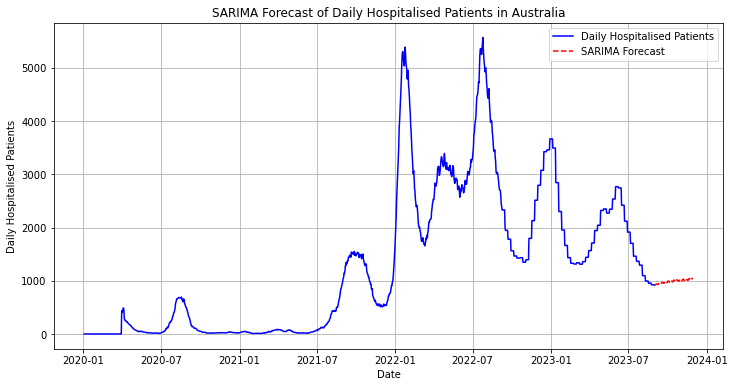

In [10]:
# Define SARIMA parameters (you may need to tune these)
order = (1, 1, 1)  # ARIMA order
seasonal_order = (1, 1, 1, 7)  # Seasonal order (7-day seasonality)

# Fit SARIMA model
sarima_model = sm.tsa.SARIMAX(daily_hospitalised_patients, order=order, seasonal_order=seasonal_order)
sarima_results = sarima_model.fit()

# Forecast future values
forecast_periods = 90  # Number of days to forecast

# Generate the forecast index as a DatetimeIndex starting from the last date in the data
last_date = daily_hospitalised_patients.index[-1]
forecast_index = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=forecast_periods, freq='D')

# Get the forecasted values
forecast_values = sarima_results.forecast(steps=forecast_periods)

# Plot the observed data and forecast
plt.figure(figsize=(12, 6))
plt.plot(daily_hospitalised_patients.index, daily_hospitalised_patients, label='Daily Hospitalised Patients', color='blue')
plt.plot(forecast_index, forecast_values, label='SARIMA Forecast', linestyle='dashed', color='red')
plt.title('SARIMA Forecast of Daily Hospitalised Patients in Australia')
plt.xlabel('Date')
plt.ylabel('Daily Hospitalised Patients')
plt.legend()
plt.grid(True)
plt.show()

The SARIMA forecast provides the forecasting result which is quite accurate with the forecasted value of around 1,000 new hospitalised patients per day in the next 90 days.